# **Importing packages**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM

# **importing dataset**

In [ ]:
data=pd.read_csv('/content/deliverytime.txt',na_values='NaN')
data

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude Type_of_order Type_of_vehicle  \
0                        75.912471        Snack      motorcycle    
1                        77.813237        Snack         scooter    
2                        77.688400       Drinks      motorcycle    
3                        77.026494       Buffet      motorcycle    
4                        80.289982        Snack         scooter    
...                            ...           ...             ...   
45588                    75.804257         Meal      motorcycle    
45589                     0.070000       Buffet      motorcycle    
45590                    80.272439       Drinks         scooter    
45591                    77.026241        Snack      motorcycle    
45592                    85.405731        Snack         scooter    

       Time_taken(min)  
0                   24  
1                   33  
2                   26  
3                   21  
4                   30  
...                ...  
45588               32  
45589               36  
45590               16  
45591               26  
45592               36  

[45593 rows x 11 columns]

# **Data Cleaning and checking**

In [ ]:
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

In [ ]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

# **Exploratory Data Analysis**

In [ ]:
#finding distance b/w restro and home

#setting earth kilometres in radius

R=6371

def degto_rad(degree):
  return degree*(np.pi/180)

def discal(lat1,long1,lat2,long2):
  dis_long=degto_rad(long2-long1)
  dis_lat=degto_rad(lat2-lat1)
  a=np.sin(dis_lat/2)**2 + np.cos(degto_rad(lat1)) * np.cos(degto_rad(long1)) * np.sin(dis_long/2)**2
  c=2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
  return R*c

data['distance']=np.nan

for i in range(len(data)): #finding distance and entering in new column
 data.loc[i,'distance']=discal(data.loc[i,'Restaurant_latitude'],data.loc[i,'Restaurant_longitude'],data.loc[i,'Delivery_location_latitude'],data.loc[i,'Delivery_location_longitude']) 

In [ ]:
data.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0                    75.912471        Snack      motorcycle                24   
1                    77.813237        Snack         scooter                33   
2                    77.688400       Drinks      motorcycle                26   
3                    77.026494       Buffet      motorcycle                21   
4                    80.289982        Snack         scooter                30   

    distance  
0   2.461191  
1  15.887213  
2   1.222133  
3   6.143979  
4   4.800794

In [ ]:
#removing longitudes and latitudes
data.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)

In [ ]:
#checking statistical data for the numerical columns
data.describe()
#seems to be some outliers in the data

Delivery_person_Age  Delivery_person_Ratings  Time_taken(min)  \
count         45593.000000             45593.000000     45593.000000   
mean             29.544075                 4.632367        26.294607   
std               5.696793                 0.327708         9.383806   
min              15.000000                 1.000000        10.000000   
25%              25.000000                 4.600000        19.000000   
50%              29.000000                 4.700000        26.000000   
75%              34.000000                 4.800000        32.000000   
max              50.000000                 6.000000        54.000000   

           distance  
count  45593.000000  
mean      62.098182  
std      580.140575  
min        1.125897  
25%        3.767913  
50%        7.500663  
75%       11.074592  
max     9528.375766

<AxesSubplot:>

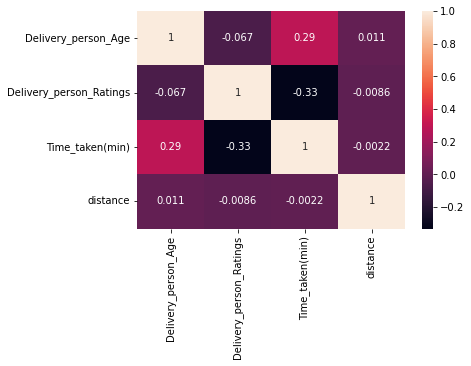

In [ ]:
#checking for co-relations
sns.heatmap(data.corr(),annot=True)

In [ ]:
#checking relation between time_taken and age
fig=px.scatter(data,x=data['Delivery_person_Age'],y=data['Time_taken(min)'],
           size=data['Time_taken(min)'],
           color=data['distance'],
           trendline='ols',
           labels={'Delivery_person_Age':'Age of person','Time_taken(min)':'Time taken'},
           title='relation between time_taken and age'
           )

fig.show()

#there is constante increase in trendline, with increase in age, time also increases

In [ ]:
#checking relation between time_taken and distance
fig=px.scatter(data,y=data['Time_taken(min)'],x=data['distance'],
           size=data['distance'],
           trendline='ols',
           #labels={'Delivery_person_Age':'Age of person','Time_taken(min)':'Time taken'},
           title='relation between time_taken and distance'
           )

fig.show()

#there is no constant increase or decrease, hence both are not co-related

In [ ]:
#checking relation between time_taken and ratings WRT age
fig=px.scatter(data,y=data['Time_taken(min)'],x=data['Delivery_person_Ratings'],
           size=data['Delivery_person_Ratings'],
           trendline='ols',
           color=data['Delivery_person_Age'],
           labels={'Delivery_person_Ratings':'Ratings','Time_taken(min)':'Time taken'},
           title='relation between time_taken and ratings'
           )

fig.show()

#with increase in ratings time decreases

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Time_taken(min)'>

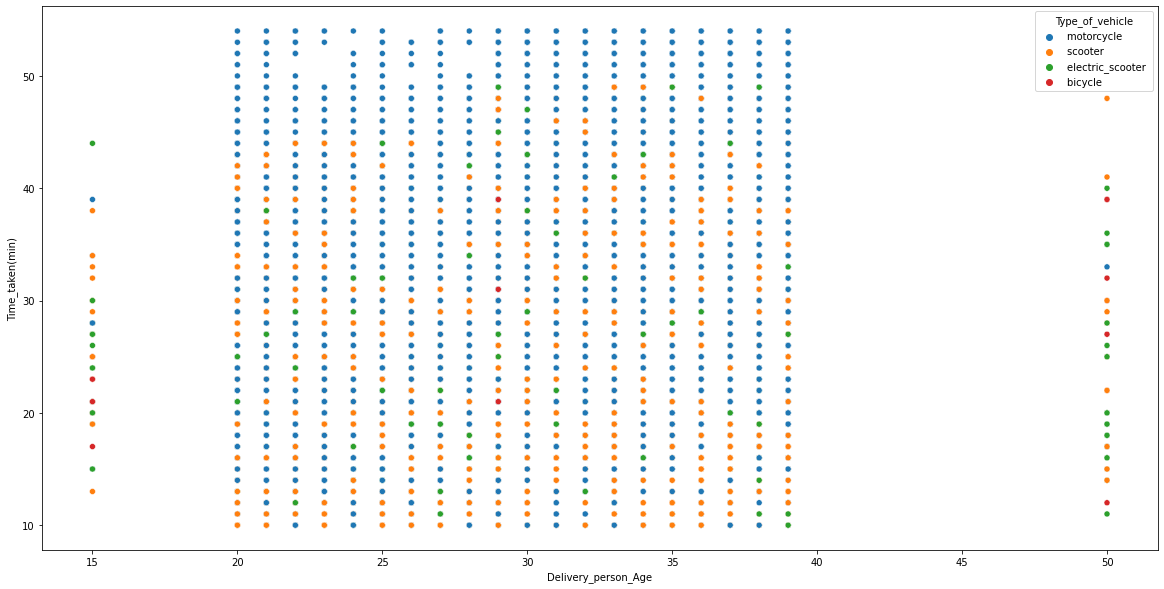

In [ ]:
#checking relation between type_of_vehicle and time taken WRT age
plt.figure(figsize=(20,10))
sns.scatterplot(y=data['Time_taken(min)'],hue=data['Type_of_vehicle'],x=data['Delivery_person_Age'])

#scooter takes less time to deliver

In [ ]:
#encoding categorical values
data['Type_of_vehicle'].unique() #finding unique values
data['Type_of_vehicle'].replace(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],[0,1,2,3],inplace=True)#encoding the variables
data

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

      Type_of_order  Type_of_vehicle  Time_taken(min)   distance  
0            Snack                 0               24   2.461191  
1            Snack                 1               33  15.887213  
2           Drinks                 0               26   1.222133  
3           Buffet                 0               21   6.143979  
4            Snack                 1               30   4.800794  
...             ...              ...              ...        ...  
45588         Meal                 0               32   1.227607  
45589       Buffet                 0               36  11.007737  
45590       Drinks                 1               16   3.600740  
45591        Snack                 0               26   4.914859  
45592        Snack                 1               36   9.222360  

[45593 rows x 8 columns]

In [ ]:
#removing under 18 aged people
data=data[data['Delivery_person_Age'] > 18]
data

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

      Type_of_order  Type_of_vehicle  Time_taken(min)   distance  
0            Snack                 0               24   2.461191  
1            Snack                 1               33  15.887213  
2           Drinks                 0               26   1.222133  
3           Buffet                 0               21   6.143979  
4            Snack                 1               30   4.800794  
...             ...              ...              ...        ...  
45588         Meal                 0               32   1.227607  
45589       Buffet                 0               36  11.007737  
45590       Drinks                 1               16   3.600740  
45591        Snack                 0               26   4.914859  
45592        Snack                 1               36   9.222360  

[45555 rows x 8 columns]

In [ ]:
#removing unwanted columns
data.drop(['ID','Delivery_person_ID','Type_of_order'],axis=1,inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

Delivery_person_Age  Delivery_person_Ratings  Type_of_vehicle  \
0                       37                      4.9                0   
1                       34                      4.5                1   
2                       23                      4.4                0   
3                       38                      4.7                0   
4                       32                      4.6                1   
...                    ...                      ...              ...   
45588                   30                      4.8                0   
45589                   21                      4.6                0   
45590                   30                      4.9                1   
45591                   20                      4.7                0   
45592                   23                      4.9                1   

       Time_taken(min)   distance  
0                   24   2.461191  
1                   33  15.887213  
2                   26   1.222133  
3                   21   6.143979  
4                   30   4.800794  
...                ...        ...  
45588               32   1.227607  
45589               36  11.007737  
45590               16   3.600740  
45591               26   4.914859  
45592               36   9.222360  

[45555 rows x 5 columns]

# **Predicting the time taken using Machine Learning model**

**Delivery_person_Age,Delivery_person_Ratings,Type_of_vehicle,Time_taken(min) are independent variables, wheras distance acts as independent variable**

In [56]:
#splitting the data
x=np.array(data[['Delivery_person_Age','Delivery_person_Ratings','Type_of_vehicle','distance']])
y=np.array(data[['Time_taken(min)']])

#train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=111)

In [60]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (train_x.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [61]:
# training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, batch_size=1, epochs=9)

Epoch 1/9
36444/36444 [==============================] - 266s 7ms/step - loss: 68.7889
Epoch 2/9
36444/36444 [==============================] - 261s 7ms/step - loss: 61.6076
Epoch 3/9
36444/36444 [==============================] - 263s 7ms/step - loss: 59.0353
Epoch 4/9
36444/36444 [==============================] - 263s 7ms/step - loss: 57.8650
Epoch 5/9
36444/36444 [==============================] - 265s 7ms/step - loss: 57.5430
Epoch 6/9
36444/36444 [==============================] - 263s 7ms/step - loss: 57.2854
Epoch 7/9
36444/36444 [==============================] - 268s 7ms/step - loss: 57.1530
Epoch 8/9
36444/36444 [==============================] - 268s 7ms/step - loss: 56.4352
Epoch 9/9
36444/36444 [==============================] - 262s 7ms/step - loss: 56.2241


In [63]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))
d=int(input("Vehicle type"))

features = np.array([[a, b, c,d]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 29
Ratings of Previous Deliveries: 6.1
Total Distance: 5876
Vehicle type1
1/1 [==============================] - 1s 1s/step
Predicted Delivery Time in Minutes =  [[19.014318]]


In [64]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))
d=int(input("Vehicle type"))

features = np.array([[a, b, c,d]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 44
Ratings of Previous Deliveries: 8.1
Total Distance: 9764
Vehicle type2
1/1 [==============================] - 0s 44ms/step
Predicted Delivery Time in Minutes =  [[20.573137]]
